In [20]:
#Lưu Đức Quang 20205117
#Ngày 28 tháng 10 năm 2021
from scipy.io import wavfile
from IPython.display import Audio
from matplotlib import pyplot as plt 
from __future__ import division      # so, 1/2 == 0.5 (forces real-valued division)
import numpy as np
import math

In [21]:
f_name = "Recording.wav"
fs, signal = wavfile.read(f_name)
signal = signal[:,1] / max(abs(signal[:,1]))  # scale signal (x[start:end:step] is the full form, Here we can omit to use a default value: start defaults to 0 , end defaults to the length of the list, and step defaults to 1
print('fs           ==> ', fs, 'Hz')                       # sampling rate
print('len(signal)  ==> ', len(signal), 'samples')

fs           ==>  48000 Hz
len(signal)  ==>  976896 samples


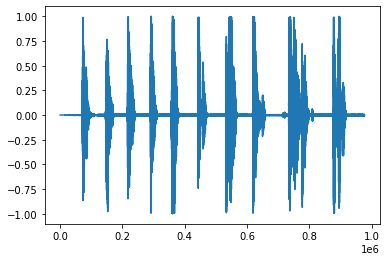

In [22]:
plt.plot(signal)

In [23]:
Audio(f_name)


In [24]:
assert fs % 1000 == 0
 
sampsPerMilli = int(fs / 1000)        #Số mẫu một ms giây
millisPerFrame = 100 #Số ms giây trên 1 frame: 1 frame = 100ms
sampsPerFrame = sampsPerMilli * millisPerFrame #Số mẫu 1 frame = số mẫu 1 ms giây x số giây 1 frame
nFrames = int(len(signal) / sampsPerFrame)        # Số frames number of non-overlapping _full_ frames
 
print ('samples/millisecond  ==> ', sampsPerMilli)
print ('samples/[%dms]frame  ==> ' % millisPerFrame, sampsPerFrame)
print ('number of frames     ==> ', nFrames)


samples/millisecond  ==>  48
samples/s]frame  ==>  4800
number of frames     ==>  203


In [25]:
STEs = []                                      # list of short-time energies Mảng STEs
for k in range(nFrames): #Từ 
    startIdx = k * sampsPerFrame #Thời điểm bắt đầu frame thứ k
    stopIdx = startIdx + sampsPerFrame #Thời điểm kết thúc frame thứ k
    window = np.zeros(signal.shape) #np.zeros để tạo ra một dãy toàn 0, signal.shape là kích thước của signal => tạo dãy 0 với số lượng = kích thước của signal
    window[startIdx:stopIdx] = 1               # Về rectangular window trong dsp lấy đối xứng qua 0 https://www.dsprelated.com/freebooks/sasp/Rectangular_Window.html
    STE = sum((signal ** 2) * (window ** 2)) #Tính năng lượng theo công thức
    STEs.append(STE) #Thêm STE vào mảng STEs

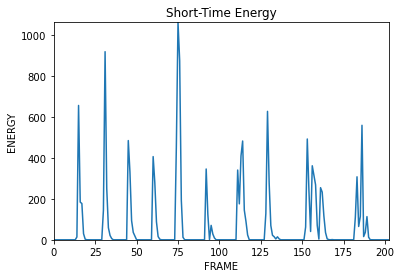

In [26]:
plt.plot(STEs)
plt.title('Short-Time Energy')
plt.ylabel('ENERGY')
plt.xlabel('FRAME')
plt.autoscale(tight='both')